In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import scipy.stats as stats
import seaborn as sns 
import xlrd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_style('darkgrid') 
font = {'weight' : 'bold', 'size' : 23}
matplotlib.rc('font', **font)
plt.style.use('seaborn')

pd.set_option('display.max_columns',0)

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.api import acf,pacf,graphics
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
import pmdarima as pm
import statsmodels.api as sm
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
from sklearn import metrics
from sklearn.metrics import mean_squared_error

import plotly.express as px
import plotly.graph_objects as go 

import warnings
warnings.filterwarnings('ignore')

In [3]:
df_orijinal = pd.read_csv('dam_occupancy.csv')

In [4]:
# Read Data Using read_csv() method
df = pd.read_csv('dam_occupancy.csv')

In [5]:
df.head()

,DATE,GENERAL_DAM_OCCUPANCY_RATE,GENERAL_DAM_RESERVED_WATER
0,2005-01-01,44.62,388
1,2005-01-02,44.62,388
2,2005-01-03,44.47,386
3,2005-01-04,44.42,386
4,2005-01-05,44.35,385


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5887 entries, 0 to 5886
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DATE                        5887 non-null   object 
 1   GENERAL_DAM_OCCUPANCY_RATE  5887 non-null   float64
 2   GENERAL_DAM_RESERVED_WATER  5887 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 138.1+ KB


In [7]:
df.describe()
##outlier: Max. deger 75. quantil'e ne kadar uzak ya da min. 25. Quantile ne kadar uzak. 
##uzakliklar arasinda standart sapmaya bakabiliriz

,GENERAL_DAM_OCCUPANCY_RATE,GENERAL_DAM_RESERVED_WATER
count,5887.000000,5887.000000
mean,64.783693,562.726346
std,23.460365,203.814001
min,9.200000,80.000000
25%,48.005000,417.000000
50%,66.680000,579.000000
75%,86.265000,749.000000
max,99.160000,861.000000


In [10]:
import datetime

In [11]:
dates = [datetime.datetime.strptime(ts, "%Y-%m-%d") for ts in df['DATE']]
dates.sort()
sorteddates = [datetime.datetime.strftime(ts, "%Y-%m-%d") for ts in dates]
df['DATE'] = pd.DataFrame({'DATE':sorteddates})
df['Year'], df['Month'],  df['Day'] = df['DATE'].str.split('-').str

In [12]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5887 entries, 0 to 5886
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   DATE                        5887 non-null   datetime64[ns]
 1   GENERAL_DAM_OCCUPANCY_RATE  5887 non-null   float64       
 2   GENERAL_DAM_RESERVED_WATER  5887 non-null   int64         
 3   Year                        5887 non-null   object        
 4   Month                       5887 non-null   object        
 5   Day                         5887 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 276.1+ KB


In [14]:
df.head()

,DATE,GENERAL_DAM_OCCUPANCY_RATE,GENERAL_DAM_RESERVED_WATER,Year,Month,Day
0,2005-01-01,44.62,388,2005,01,01
1,2005-01-02,44.62,388,2005,01,02
2,2005-01-03,44.47,386,2005,01,03
3,2005-01-04,44.42,386,2005,01,04
4,2005-01-05,44.35,385,2005,01,05


In [15]:
df1 = df.set_index(['DATE'])
df1.head()

,GENERAL_DAM_OCCUPANCY_RATE,GENERAL_DAM_RESERVED_WATER,Year,Month,Day
DATE,,,,,
2005-01-01,44.62,388,2005,01,01
2005-01-02,44.62,388,2005,01,02
2005-01-03,44.47,386,2005,01,03
2005-01-04,44.42,386,2005,01,04
2005-01-05,44.35,385,2005,01,05


In [16]:
df1["Month"] = df1["Month"].astype(str).astype(int)
df1["Day"] = df1["Day"].astype(str).astype(int)
df1["Year"] = df1["Year"].astype(str).astype(int)

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5887 entries, 2005-01-01 to 2021-02-13
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   GENERAL_DAM_OCCUPANCY_RATE  5887 non-null   float64
 1   GENERAL_DAM_RESERVED_WATER  5887 non-null   int64  
 2   Year                        5887 non-null   int64  
 3   Month                       5887 non-null   int64  
 4   Day                         5887 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 276.0 KB


In [18]:
df1.shape

(5887, 5)

In [19]:
df1.columns

Index(['GENERAL_DAM_OCCUPANCY_RATE', 'GENERAL_DAM_RESERVED_WATER', 'Year',
       'Month', 'Day'],
      dtype='object')

In [20]:
df1.describe()

,GENERAL_DAM_OCCUPANCY_RATE,GENERAL_DAM_RESERVED_WATER,Year,Month,Day
count,5887.000000,5887.000000,5887.000000,5887.000000,5887.000000
mean,64.783693,562.726346,2012.563445,6.482928,15.709529
std,23.460365,203.814001,4.650621,3.466701,8.801327
min,9.200000,80.000000,2005.000000,1.000000,1.000000
25%,48.005000,417.000000,2009.000000,3.000000,8.000000
50%,66.680000,579.000000,2013.000000,6.000000,16.000000
75%,86.265000,749.000000,2017.000000,9.500000,23.000000
max,99.160000,861.000000,2021.000000,12.000000,31.000000


In [21]:
df1.isna().any()

GENERAL_DAM_OCCUPANCY_RATE    False
GENERAL_DAM_RESERVED_WATER    False
Year                          False
Month                         False
Day                           False
dtype: bool

In [22]:
df1.isnull().sum()

GENERAL_DAM_OCCUPANCY_RATE    0
GENERAL_DAM_RESERVED_WATER    0
Year                          0
Month                         0
Day                           0
dtype: int64

In [23]:
df1.head()

,GENERAL_DAM_OCCUPANCY_RATE,GENERAL_DAM_RESERVED_WATER,Year,Month,Day
DATE,,,,,
2005-01-01,44.62,388,2005,1,1
2005-01-02,44.62,388,2005,1,2
2005-01-03,44.47,386,2005,1,3
2005-01-04,44.42,386,2005,1,4
2005-01-05,44.35,385,2005,1,5


In [24]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
df1 = pd.read_csv('dam_occupancy.csv', parse_dates=['DATE'], index_col='DATE',date_parser=dateparse)
df1.head()

,GENERAL_DAM_OCCUPANCY_RATE,GENERAL_DAM_RESERVED_WATER
DATE,,
2005-01-01,44.62,388
2005-01-02,44.62,388
2005-01-03,44.47,386
2005-01-04,44.42,386
2005-01-05,44.35,385


<AxesSubplot:xlabel='GENERAL_DAM_OCCUPANCY_RATE'>

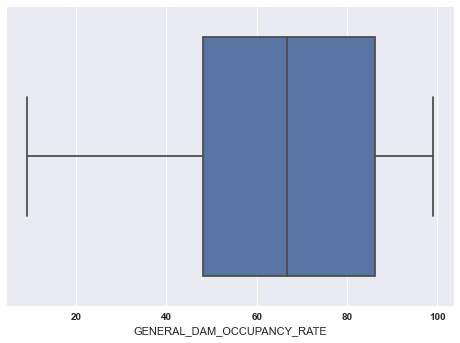

In [25]:
sns.boxplot(x = df1["GENERAL_DAM_OCCUPANCY_RATE"])

<AxesSubplot:xlabel='GENERAL_DAM_RESERVED_WATER'>

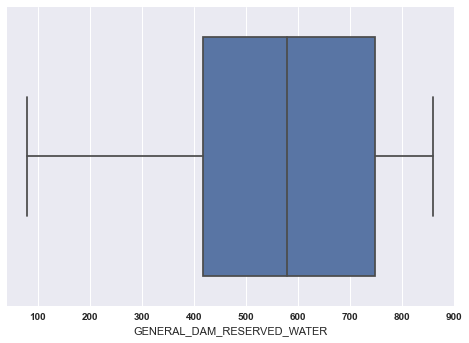

In [26]:
sns.boxplot(x = df1["GENERAL_DAM_RESERVED_WATER"])

<AxesSubplot:>

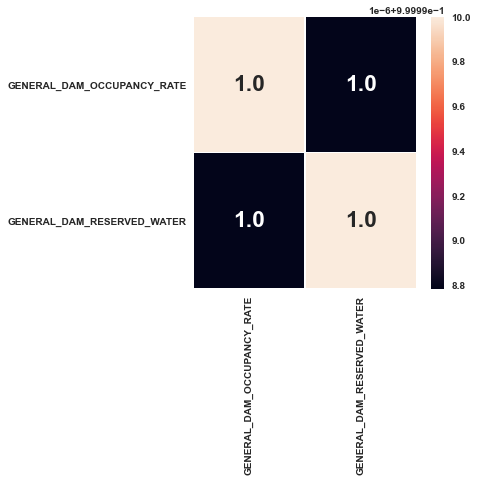

In [27]:
#correlation map
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(df_orijinal.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

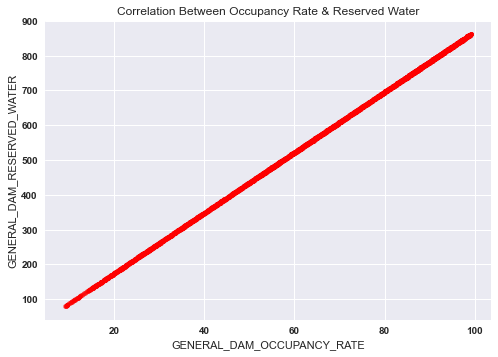

In [28]:
df.plot(kind = 'scatter', x = 'GENERAL_DAM_OCCUPANCY_RATE', y = 'GENERAL_DAM_RESERVED_WATER', alpha = 0.5, color = 'red')
plt.xlabel('GENERAL_DAM_OCCUPANCY_RATE')
plt.ylabel('GENERAL_DAM_RESERVED_WATER')
plt.title('Correlation Between Occupancy Rate & Reserved Water')
plt.show() ###strong positive linear 

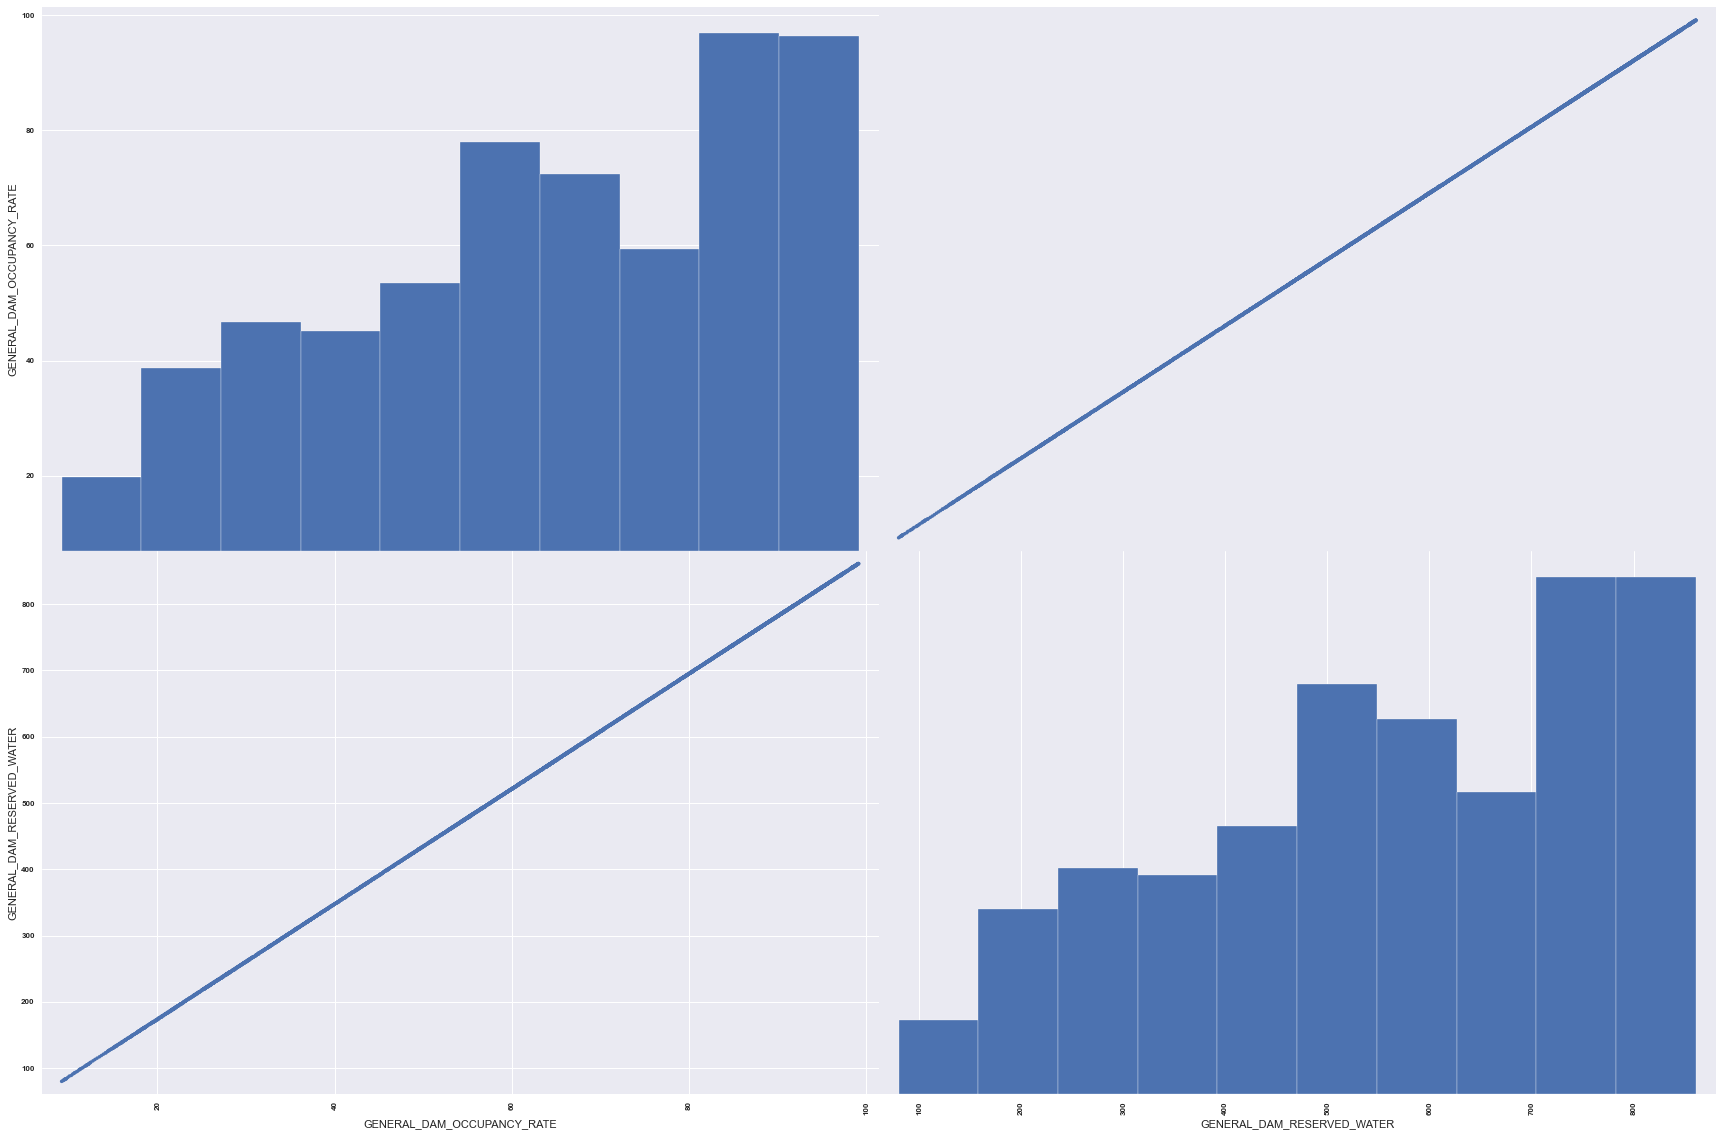

In [29]:
# define the plot
pd.plotting.scatter_matrix(df_orijinal, alpha = 1, figsize = (30, 20))

# show the plot
plt.show()

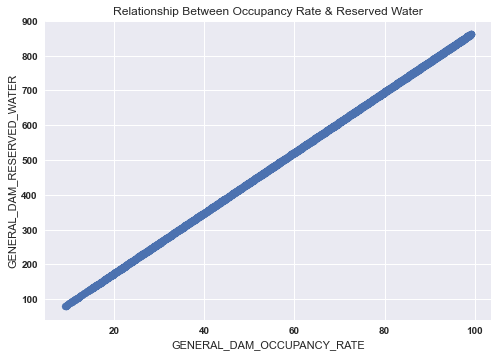

In [30]:
fig, ax = plt.subplots()
ax.scatter(df.GENERAL_DAM_OCCUPANCY_RATE, df.GENERAL_DAM_RESERVED_WATER, cmap="viridis")
ax.set_xlabel('GENERAL_DAM_OCCUPANCY_RATE')
ax.set_ylabel('GENERAL_DAM_RESERVED_WATER')
ax.set_title("Relationship Between Occupancy Rate & Reserved Water")
plt.show()

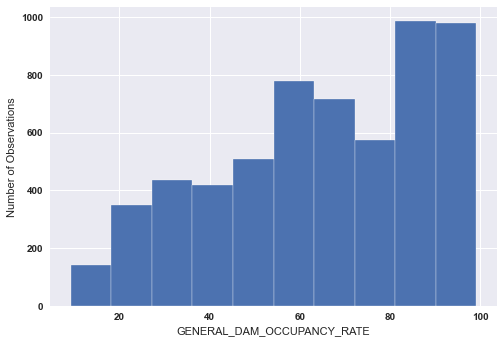

In [31]:
fig, ax = plt.subplots()
ax.hist(df.GENERAL_DAM_OCCUPANCY_RATE, label="GENERAL_DAM_OCCUPANCY_RATE", bins=10)
ax.set_xlabel("GENERAL_DAM_OCCUPANCY_RATE")
ax.set_ylabel("Number of Observations")
plt.show()

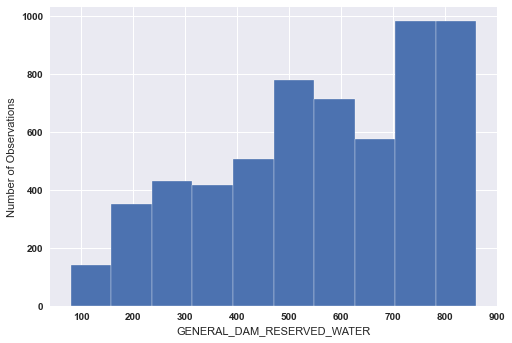

In [32]:
fig, ax = plt.subplots()
ax.hist(df.GENERAL_DAM_RESERVED_WATER, label="GENERAL_DAM_RESERVED_WATER", bins=10)
ax.set_xlabel("GENERAL_DAM_RESERVED_WATER")
ax.set_ylabel("Number of Observations")
plt.show()

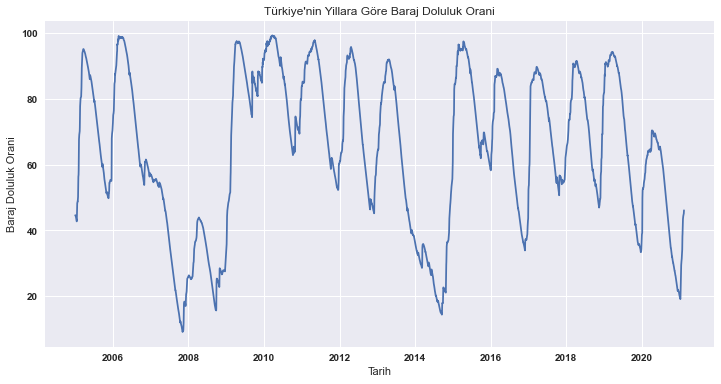

In [33]:
plt.figure(figsize=(12,6))

plt.plot(df.DATE,df.GENERAL_DAM_OCCUPANCY_RATE) #biz belirlemediğimiz sürece rengi otomatik kendisi verir. 
plt.title("Türkiye'nin Yillara Göre Baraj Doluluk Orani")
plt.xlabel("Tarih")
plt.ylabel("Baraj Doluluk Orani")
plt.show()

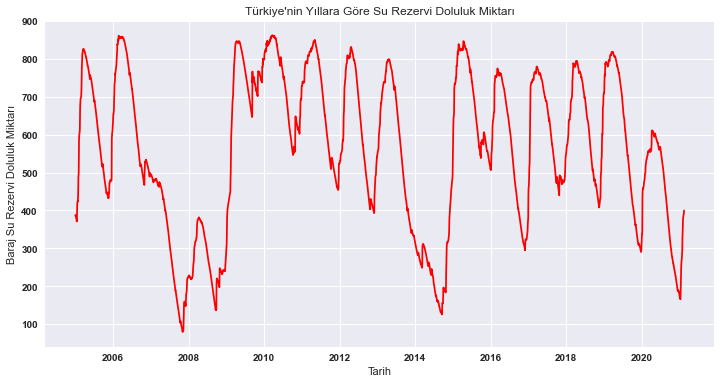

In [34]:
plt.figure(figsize=(12,6))

#plt.plot(df.DATE,df.GENERAL_DAM_OCCUPANCY_RATE, color="blue")
plt.plot(df.DATE,df.GENERAL_DAM_RESERVED_WATER,color="red")

plt.xlabel("Tarih")

plt.ylabel("Baraj Su Rezervi Doluluk Miktarı")

plt.title("Türkiye'nin Yıllara Göre Su Rezervi Doluluk Miktarı")

plt.show()

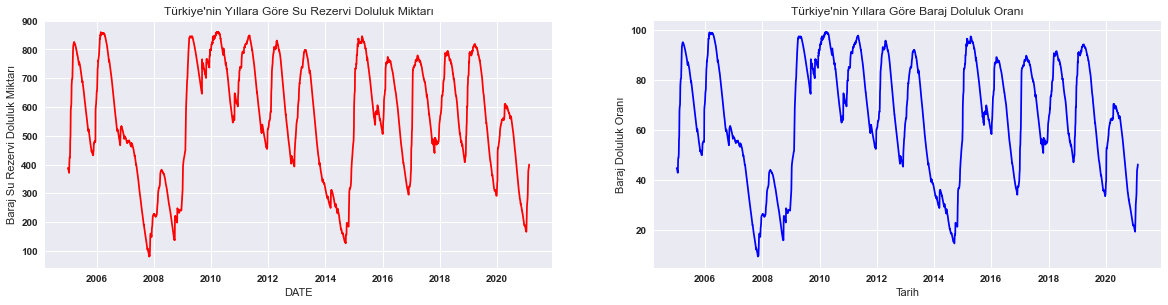

In [35]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)   
plt.plot(df.DATE,df.GENERAL_DAM_RESERVED_WATER,color="r") 
plt.xlabel("DATE")
plt.ylabel("Baraj Su Rezervi Doluluk Miktarı")
plt.title("Türkiye'nin Yıllara Göre Su Rezervi Doluluk Miktarı")

plt.subplot(2,2,2)
plt.plot(df.DATE,df.GENERAL_DAM_OCCUPANCY_RATE,color="blue")
plt.xlabel("Tarih")
plt.ylabel("Baraj Doluluk Oranı")
plt.title("Türkiye'nin Yıllara Göre Baraj Doluluk Oranı")

plt.show()

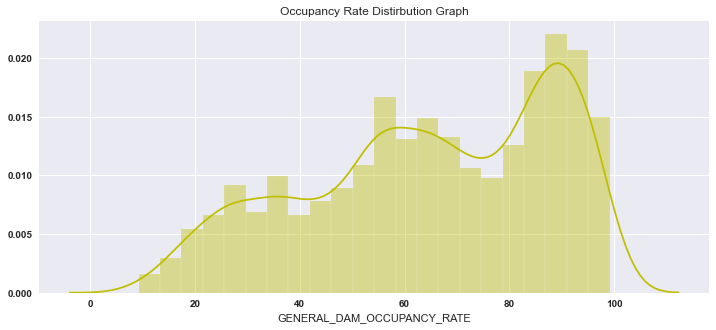

In [36]:
plt.figure(figsize=(12,5))
plt.title("Occupancy Rate Distirbution Graph")
ax = sns.distplot(df["GENERAL_DAM_OCCUPANCY_RATE"], color = 'y')

Text(0.5, 1.0, 'Occupancy Rate by Month')

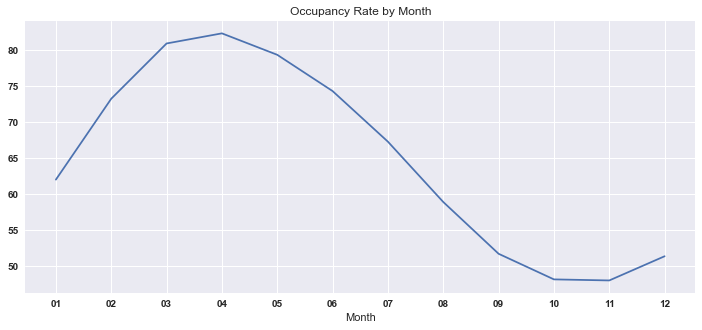

In [39]:
##aylara gore degisim 
dategroup=df.groupby('Month').mean()
fig, ax = plt.subplots(figsize=(12,5))
ax.xaxis.set(ticks=range(0,13)) # Manually set x-ticks
dategroup['GENERAL_DAM_OCCUPANCY_RATE'].plot(x=df.Month)
plt.title('Occupancy Rate by Month')

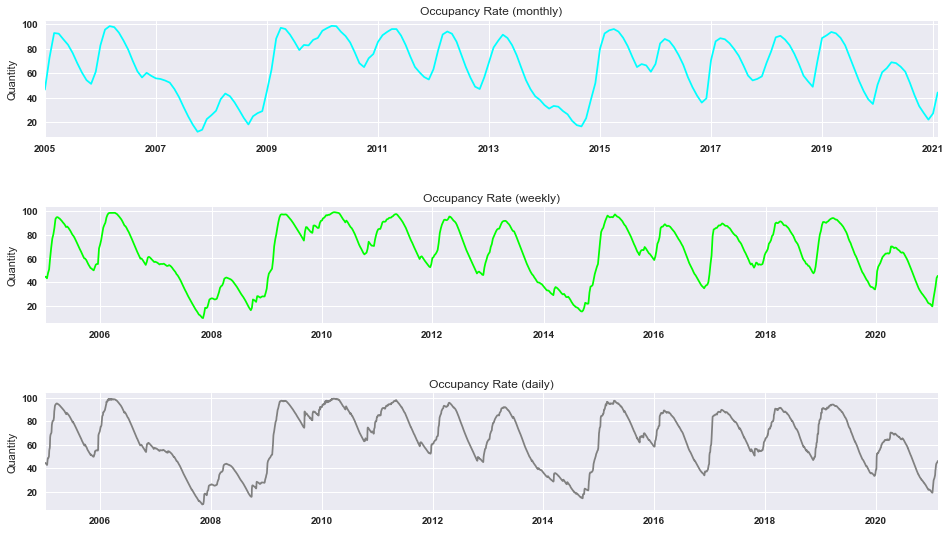

In [40]:
#import matplotlib.pyplot as plt
f,ax=plt.subplots(3,1,figsize=(16,9))

df2 = df.resample('M', on='DATE').mean()
df3 = df.resample('W', on='DATE').mean()
df4 = df.resample('D', on='DATE').mean()

df2['GENERAL_DAM_OCCUPANCY_RATE'].plot(ax = ax[0], color = 'cyan')
ax[0].set_title('Occupancy Rate (monthly)')
ax[0].set_xlabel('')
ax[0].set_ylabel('Quantity')

df3['GENERAL_DAM_OCCUPANCY_RATE'].plot(ax = ax[1], color = 'lime')
ax[1].set_title('Occupancy Rate (weekly)')
ax[1].set_xlabel('')
ax[1].set_ylabel('Quantity')

df4['GENERAL_DAM_OCCUPANCY_RATE'].plot(ax = ax[2], color = 'grey')
ax[2].set_title('Occupancy Rate (daily)')
ax[2].set_xlabel('')
ax[2].set_ylabel('Quantity')

f.subplots_adjust(hspace=0.6)
plt.show()

In [41]:
from pandas import DataFrame
from pandas import Grouper
from pandas import Series
from pandas import concat

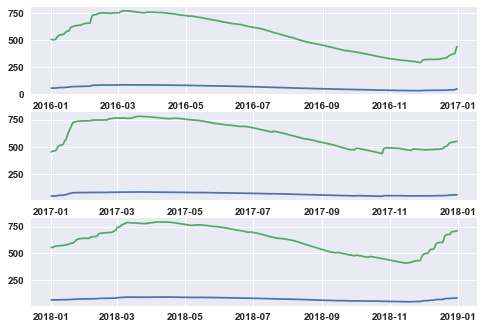

In [42]:
groups = df1.loc['2016' : '2018'].groupby(Grouper(freq='A'))
years = DataFrame()
plt.figure()
i = 1
n_groups = len(groups)
for name, group in groups:
  plt.subplot((n_groups*100) + 10 + i)
  i += 1
  plt.plot(group)
plt.show()

In [45]:
df2 = df1['GENERAL_DAM_RESERVED_WATER']

In [46]:
df2.tail()

DATE
2021-02-09    389
2021-02-10    390
2021-02-11    391
2021-02-12    395
2021-02-13    400
Name: GENERAL_DAM_RESERVED_WATER, dtype: int64

In [47]:
df1.columns

Index(['GENERAL_DAM_OCCUPANCY_RATE', 'GENERAL_DAM_RESERVED_WATER'], dtype='object')

In [48]:
##stationary

In [49]:
df1.head()

,GENERAL_DAM_OCCUPANCY_RATE,GENERAL_DAM_RESERVED_WATER
DATE,,
2005-01-01,44.62,388
2005-01-02,44.62,388
2005-01-03,44.47,386
2005-01-04,44.42,386
2005-01-05,44.35,385


In [50]:
df1.loc['2018'].head()

,GENERAL_DAM_OCCUPANCY_RATE,GENERAL_DAM_RESERVED_WATER
DATE,,
2018-01-01,63.90,555
2018-01-02,64.08,557
2018-01-03,64.27,558
2018-01-04,64.95,564
2018-01-05,65.31,567


In [51]:
df1.loc['2018'].sum()

GENERAL_DAM_OCCUPANCY_RATE     26464.96
GENERAL_DAM_RESERVED_WATER    229891.00
dtype: float64

In [52]:
df1.loc['2020' : '2021'].count()


GENERAL_DAM_OCCUPANCY_RATE    409
GENERAL_DAM_RESERVED_WATER    409
dtype: int64

In [53]:
#df2 = df_orijinal['GENERAL_DAM_RESERVED_WATER']
#df1.head()
columns_to_drop = ['GENERAL_DAM_OCCUPANCY_RATE']
df2 = df1.drop(columns_to_drop, axis=1, inplace=True)

In [57]:
df1.head()

,GENERAL_DAM_RESERVED_WATER
DATE,
2005-01-01,388
2005-01-02,388
2005-01-03,386
2005-01-04,386
2005-01-05,385


In [55]:
##sütunu seçelim ve ayrı bir değişkene aktaralım. 
##( data değişkeni DataFrame  tipinde, ts değişkeni pandas Series tipinde )

In [58]:
time_series = df1
##Artık herhangi bir zamandaki veriye şu şekilde erişebiliriz ya da tarih aralığı verebiliriz.

In [59]:
#ts.head()
#ts['2021-02-13']

year_2020 = time_series['2020-01-01':'2020-12-31']
year_2019 = time_series['2019-01-01':'2019-12-31']

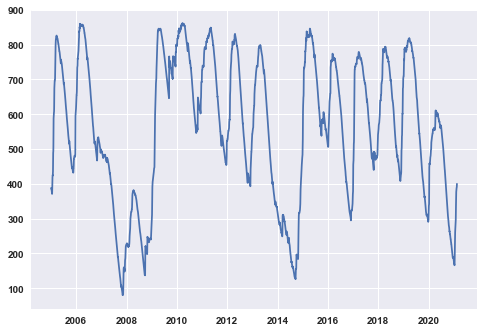

In [60]:
 plt.plot(time_series) ##belirli bir trend yok

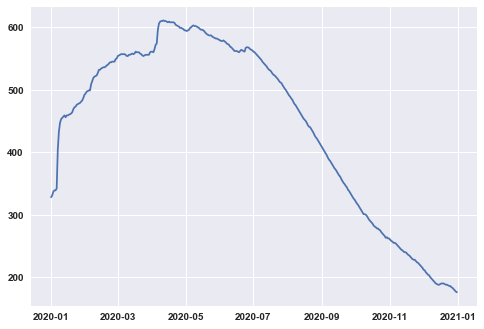

In [61]:
##2020 yili 
plt.plot(year_2020)

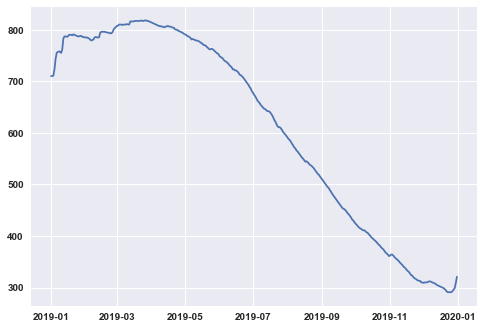

In [62]:
##2019 yili
plt.plot(year_2019)

In [63]:
##stationary

In [65]:
print("p-value:", adfuller(df1.dropna())[1])
#smaller than the 50% so data is stationary and so we can apply arima model

p-value: 6.141967127025088e-06


In [67]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean() # 24 hours on each day
    rollling_std = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    original = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rollling_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

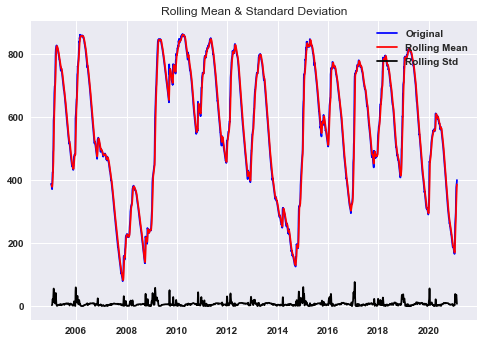

In [68]:
test_stationarity(time_series)

In [70]:
##Building ARIMA Forecasting Models
##Nonseasonal ARIMA Model
Model1 = ARIMA(df1,order= (1,1,1))
Model1_fit = Model1.fit(disp=0)
print(Model1_fit.summary())

                                  ARIMA Model Results                                   
Dep. Variable:     D.GENERAL_DAM_RESERVED_WATER   No. Observations:                 5886
Model:                           ARIMA(1, 1, 1)   Log Likelihood              -16124.209
Method:                                 css-mle   S.D. of innovations              3.745
Date:                          Fri, 07 May 2021   AIC                          32256.418
Time:                                  03:11:08   BIC                          32283.139
Sample:                                       1   HQIC                         32265.706
                                                                                        
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.0035      0.128      0.027      0.978    

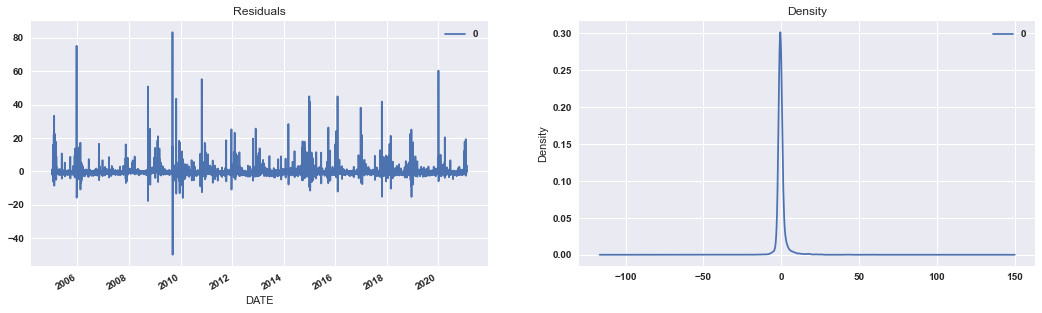

In [71]:
#Plot Residuel Errors
residuals1 = pd.DataFrame(Model1_fit.resid)
fig,ax = plt.subplots(1,2)
residuals1.plot(title = "Residuals", ax = ax[0], figsize = (18,5))
residuals1.plot(kind = 'kde', title = 'Density', ax = ax[1])
plt.show()

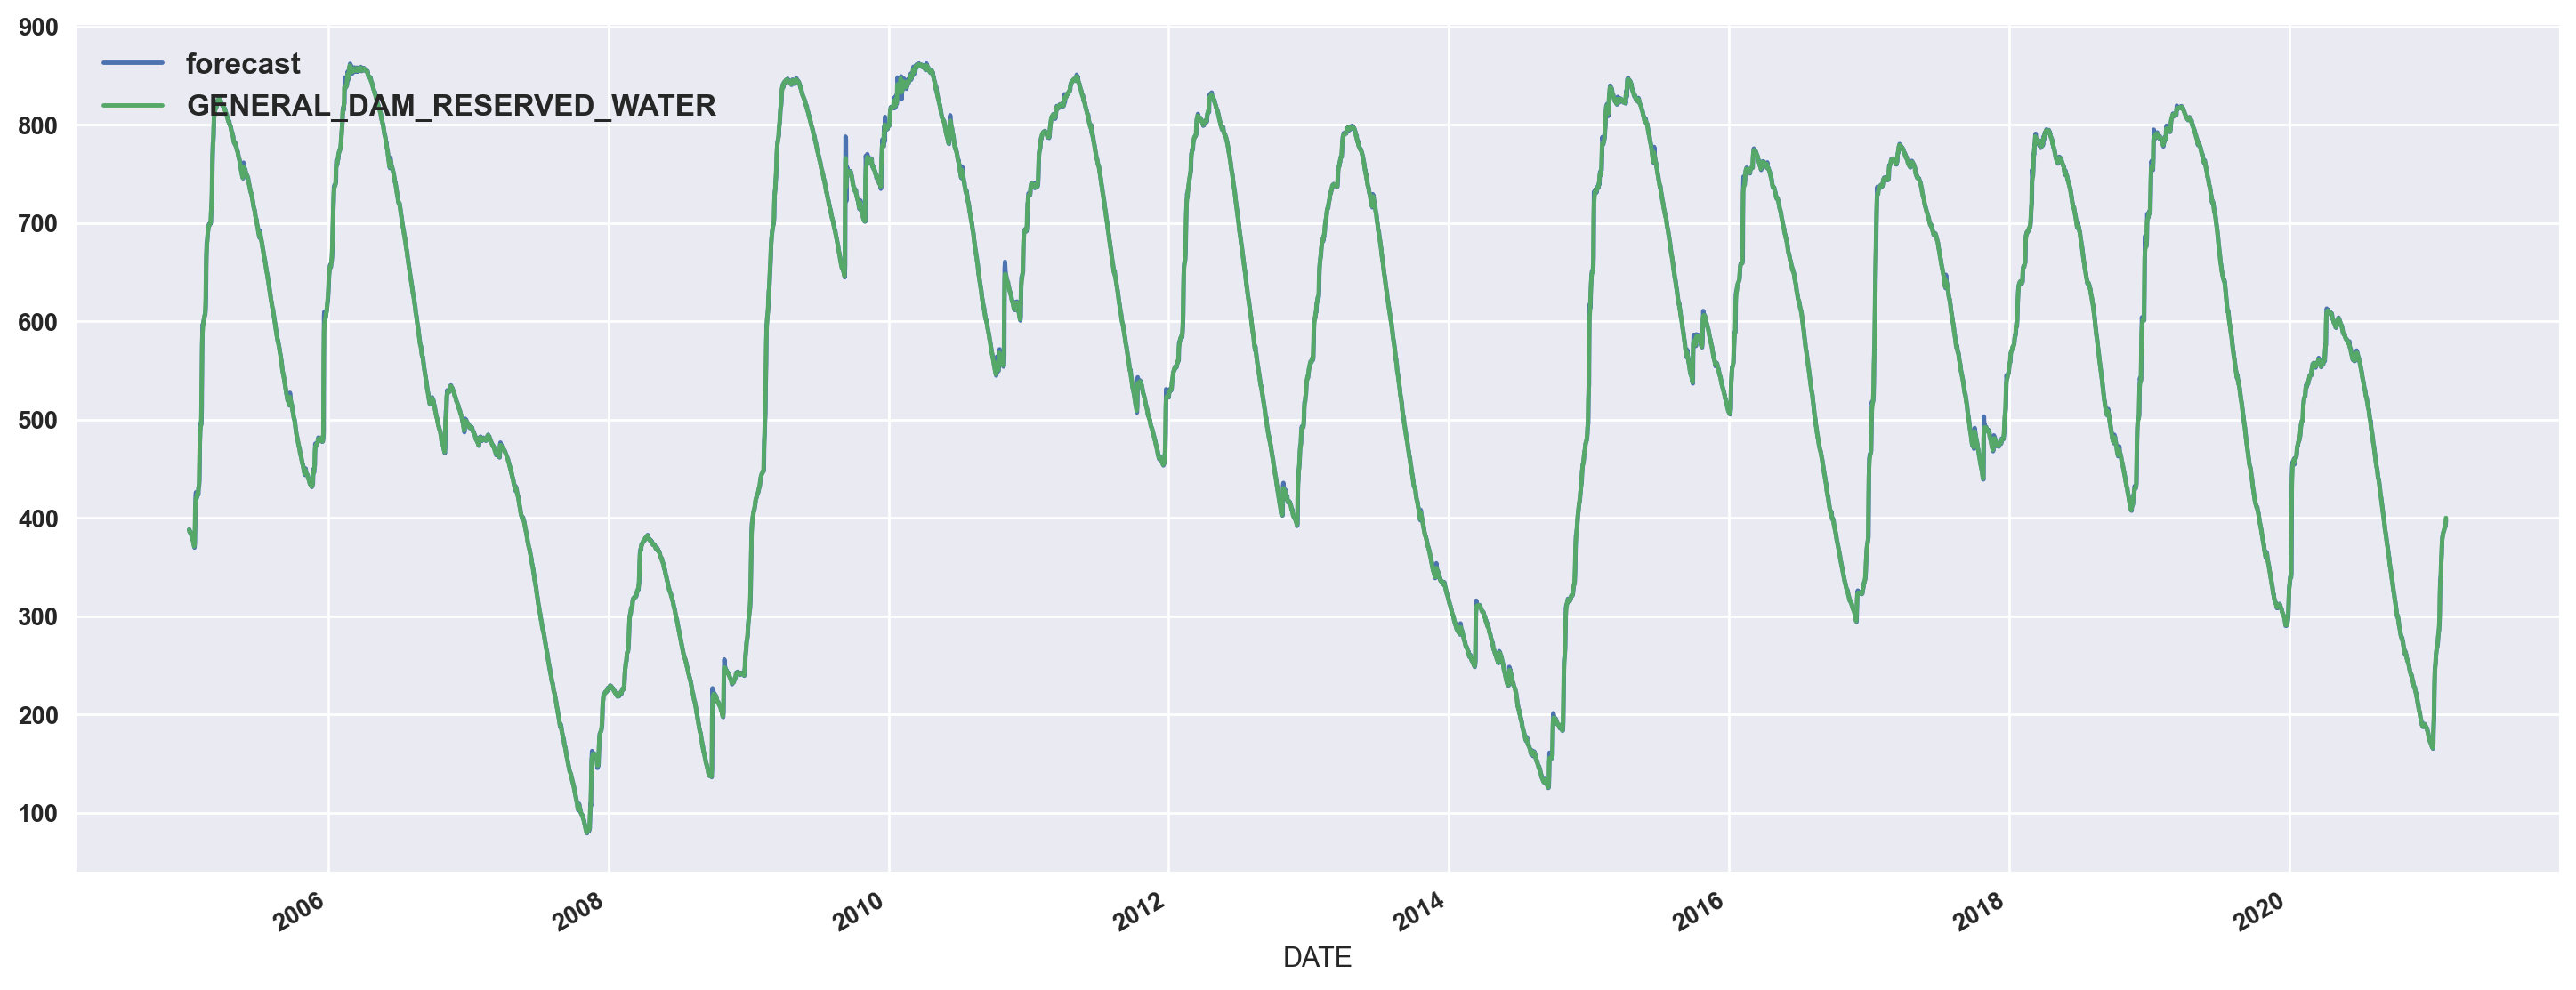

In [72]:
#Actual VS Fitted
plt.rcParams.update({'figure.figsize': (18,7), 'figure.dpi':200})
Model1_fit.plot_predict(dynamic=False)

plt.legend(loc='upper left', fontsize=12)
plt.show()

In [74]:
#Create Training and Testing Set
size = int(len(df1) * 0.80)
train = df1[0:size]
test = df1[size:len(df1)]

In [75]:
Model2 = ARIMA(train, order = (3,2,1))
fitted = Model2.fit(disp=-1)
print(fitted.summary())

                                   ARIMA Model Results                                   
Dep. Variable:     D2.GENERAL_DAM_RESERVED_WATER   No. Observations:                 4707
Model:                            ARIMA(3, 2, 1)   Log Likelihood              -12893.235
Method:                                  css-mle   S.D. of innovations              3.744
Date:                           Fri, 07 May 2021   AIC                          25798.469
Time:                                   03:11:58   BIC                          25837.210
Sample:                               01-03-2005   HQIC                         25812.089
                                    - 11-22-2017                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -0.0005      0.005     -0.099    

In [76]:
#Forecast
fc,se,conf = fitted.forecast(1178, alpha=0.05) #95% conf

#Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[1,0], index = test.index)
upper_series = pd.Series(conf[1,0], index = test.index)

In [79]:
fc

array([481.35356224, 481.76733684, 482.09373153, ..., 313.33464397,
       312.88126976, 312.42736844])

In [77]:
fc_series

DATE
2017-11-23    481.353562
2017-11-24    481.767337
2017-11-25    482.093732
2017-11-26    482.319191
2017-11-27    482.507276
                 ...    
2021-02-09    314.239811
2021-02-10    313.787491
2021-02-11    313.334644
2021-02-12    312.881270
2021-02-13    312.427368
Length: 1178, dtype: float64

In [90]:
import pandas as pd

# 1. Adım
#series = pd.Series(["NewYork","LA","London","Istanbul"])
#print(type(series))

# 2. Adım
#dateIndex = pd.DatetimeIndex('2019-01-01', freq ='W',
                     #periods = 4, tz = 'Europe/Berlin')

# 3. Adım
#fc_series.index = dateIndex
#print(fc_series)

# 4. Adım
dataframe = fc_series.to_frame()
print(type(dataframe))

<class 'pandas.core.frame.DataFrame'>


In [91]:
dataframe

,0
DATE,
2017-11-23,481.353562
2017-11-24,481.767337
2017-11-25,482.093732
2017-11-26,482.319191
2017-11-27,482.507276
...,...
2021-02-09,314.239811
2021-02-10,313.787491
2021-02-11,313.334644


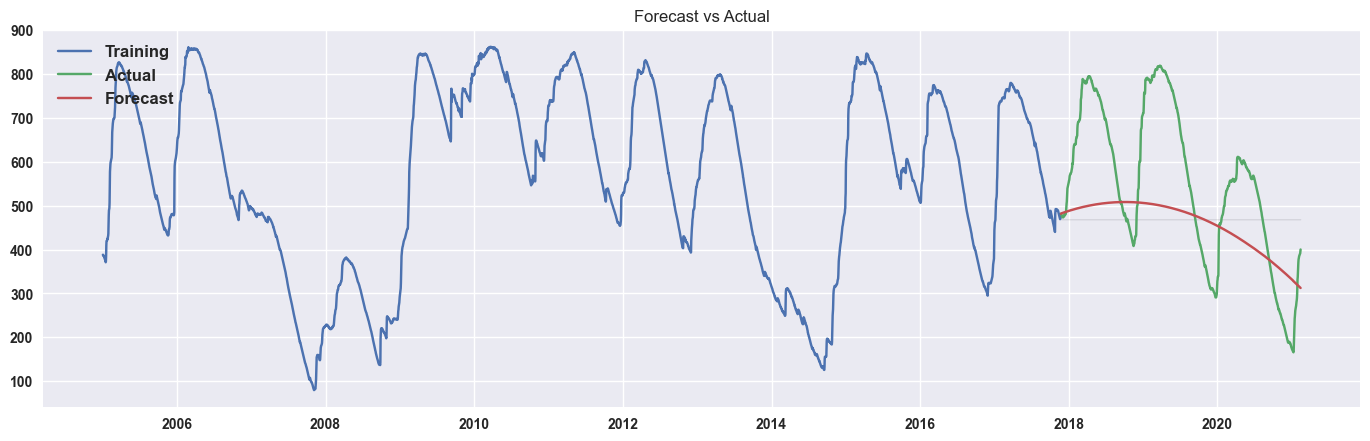

In [78]:
#Plot 
plt.figure(figsize = (17,5),dpi=100)
plt.plot(train, label = "Training")
plt.plot(test, label = "Actual")
plt.plot(fc_series, label = "Forecast")
plt.fill_between(lower_series.index, lower_series, upper_series, color = 'k', alpha = .15)
plt.title("Forecast vs Actual")
plt.legend(loc = "upper left", fontsize = 12)
plt.show()

In [ ]:
#ARIMA(2,0,1)
Model3 = ARIMA(train, order = (3,0,2))
fitted = Model3.fit(disp=-1)
#print(fitted.summary())

#Forecast
fc,se,conf = fitted.forecast(1178, alpha=0.05) #95% conf

#Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:,0], index = test.index)
upper_series = pd.Series(conf[:,1], index = test.index)

#Plot 
plt.figure(figsize = (18,8),dpi=100)
plt.plot(train, label = "Training")
plt.plot(test, label = "Actual")
plt.plot(fc_series, label = "Forecast")
plt.fill_between(lower_series.index, lower_series, upper_series, color = 'k', alpha = .15)
plt.title("Forecast vs Actual")
plt.legend(loc = "upper left", fontsize = 12)
plt.show()


In [ ]:
model_auto = pm.auto_arima(df1["GENERAL_DAM_OCCUPANCY_RATE"], start_p = 1, start_q = 1,
                          test = 'adf',
                          max_p=3,max_q=3,     #use adftest to find optimal 'd'
                          m=1,                 #maximum p and q 
                          d=None,              #frequency of series
                          seasonal = False,    #let model determine 'd'
                          start_P=0,           #No Seasonality
                          D=0,
                          trace = True,
                          error_action = 'ignore',
                          suppress_warnings = True,
                          stepwise = True)
print(model_auto.summary())

In [ ]:
model_auto.plot_diagnostics(figsize = (18,10))
plt.show()

In [ ]:
model_seasonal = pm.auto_arima(df1["GENERAL_DAM_OCCUPANCY_RATE"], start_p = 1, start_q = 1,
                          test = 'adf',
                          max_p=3,max_q=3,     
                          m=12,                  
                          d=None,              
                          seasonal = True,     
                          start_P=0,           
                          D=1,
                          trace = True,
                          error_action = 'ignore',
                          suppress_warnings = True,
                          stepwise = True)
print(model_seasonal.summary())

In [ ]:
n_periods = 30
fitted, confint = model_seasonal.predict(n_periods = n_periods, return_conf_int = True)
index_of_fc = pd.date_range(df1["GENERAL_DAM_OCCUPANCY_RATE"].index[536], periods = n_periods, freq = 'MS')

#make series for plotting purpose
fitted_series = pd.Series(fitted, index = index_of_fc)
lower_series = pd.Series(confint[:,0], index = index_of_fc)
upper_series = pd.Series(confint[:,1], index = index_of_fc)

#plot
plt.figure(figsize = (18,10))
plt.plot(df1["GENERAL_DAM_OCCUPANCY_RATE"])
plt.plot(fitted_series, color = 'darkgreen')
plt.fill_between(lower_series.index,
                lower_series,
                upper_series,
                color = 'k', alpha = .15)
plt.title('SARIMA - Final Forecasting Model')
plt.show()


In [ ]:
fc_series

In [ ]:
#pd.set_option('display.max_rows', None)
#print(fc_series)
#fc_series.to_csv(index=False)
compression_opts = dict(method='zip',
                         archive_name='out.csv')  
fc_series.to_csv('out.zip', index=False,
           compression=compression_opts)

In [ ]:
#fc_series.to_json()
#forecast = fc_series.set_index(['DATE'])
#forecast.head()
fc_series.reset_index(drop=True, inplace=True)

In [ ]:
fc_series.to_json()

In [ ]:
fc_series.to_json (r'C:\Users\ahsenkaraman\Documents\testing\out.json')


In [ ]:
fc_series.to_csv(r'C:\Users\ahsenkaraman\Documents\testing\out.csv')

In [ ]:
import matplotlib.dates as mdates

In [ ]:
ts = df2.set_index(['DATE'])
#df1.head()
columns_to_drop = ['GENERAL_DAM_OCCUPANCY_RATE', 'Year', 'Month', 'Day']
df2 = df1.drop(columns_to_drop, axis=1, inplace=True)

In [ ]:
df1.head()

In [ ]:
decomposition = sm.tsa.seasonal_decompose(df1, model = 'additive')
fig = decomposition.plot()
matplotlib.rcParams['figure.figsize'] = [9.0,5.0]

In [ ]:
df1.head()

In [ ]:
fig, ax = plt.subplots()
ax.grid(True)
year = mdates.YearLocator(month=1)
month = mdates.MonthLocator(interval=3)
year_format = mdates.DateFormatter('%Y')
month_format = mdates.DateFormatter('%m')
ax.xaxis.set_minor_locator(month)
ax.xaxis.grid(True, which = 'minor')
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_format)
plt.plot(df1.index, df1["GENERAL_DAM_OCCUPANCY_RATE"], c='blue')
plt.plot(decomposition.trend.index, decomposition.trend, c='red')

In [92]:
dataframe.to_csv(r'C:\Users\ahsenkaraman\Documents\testing\out2.csv')

In [97]:
dataframe.to_json (r'C:\Users\ahsenkaraman\Documents\testing\out2.json')

ValueError: DataFrame index must be unique for orient='columns'.